# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

- **Consider a significance level of 5% for all tests.**

In [188]:
# import numpy and pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [17]:
# Your code here:
pokemon.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.shape

(800, 13)

In [5]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [6]:
# Your code here:
pokemon["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [7]:
percentage_legendary= (735/800)*100
round(percentage_legendary,2)

91.88

In [8]:
percentage_non_legendary=(65/800)*100
round(percentage_non_legendary,2)

8.12

There are 65 legendary pokemons and 735 non_legendary pokemons, corresponding to 8,12% and 91,88% respectively

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [30]:
# Your code here:
pokemons_legendary= pokemon[pokemon["Legendary"]== True]
pokemons_legendary.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [29]:
# Your code here:
pokemons_non_legendary= pokemon[pokemon["Legendary"]== False]
pokemons_non_legendary.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
mean_legendary= pokemons_legendary["Total"].mean()
mean_legendary

637.3846153846154

In [26]:
std_legendary= pokemons_legendary["Total"].std()
std_legendary

60.93738905315346

In [24]:
mean_non_legendary= pokemons_non_legendary["Total"].mean()
mean_non_legendary

417.21360544217686

In [28]:
std_non_legendary= pokemons_non_legendary["Total"].std()
std_non_legendary

106.76041745713022

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal. --> equal_var=False.   Specifies Welch’s t-test, which is used when we assume unequal variances between the two groups.

In [31]:
# Your code here:
import scipy.stats as st

In [56]:
pokemons_legendary_total=  pokemon[pokemon["Legendary"]== True]["Total"]
pokemons_legendary_total.head(3).reset_index()

,index,Total
0,156,580
1,157,580
2,158,580


In [57]:
pokemons_non_legendary_total=  pokemon[pokemon["Legendary"]== False]["Total"]
pokemons_non_legendary_total.head(3).reset_index()

,index,Total
0,0,318
1,1,405
2,2,525


In [55]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(pokemons_legendary_total, pokemons_non_legendary_total, equal_var=False)

alpha = 0.05

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: There is not a significant difference between the two groups.")
else:
    print("Reject the Null Hypothesis: There is a significant difference between the two groups.")


Reject the Null Hypothesis: There is a significant difference between the two groups.


In [52]:
p_value

9.357954335957446e-47

What do you conclude from this test? Write your conclusions below.

#### Your conclusions here:

To get the bellow conclusions we used a two sample ttest for independent variables in order to check wheter there is a difference between the 2 groups.

We can conclude that since the p value is less than the alpha we reject the H0 whcih means that there is a significant difference between the Pokemon Legendary and Pokemon Non Legendary.

We also see that the mean of the Total for Pokemon Legendary is 637 and the mean of the Total for Pokemon Non Legendary is 417 which shows that the Total power of the Legendary is significantly higher than the Non Legendary, so by analysing these values we can also conclude that indeed there is a significant difference between the 2 groups.

We also analysed the standard deviation for both groups and we see that is higher for the non legendary group indicating that total power is more variable in this group, likely due to its larger size about 91,88% of the df.

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [58]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [63]:
# Your code here:
pokemon["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [104]:
pokemon_type= pokemon["Type 1"].value_counts().reset_index()
pokemon_type

,Type 1,count
0,Water,112
1,Normal,98
2,Grass,70
3,Bug,69
4,Psychic,57
5,Fire,52
6,Electric,44
7,Rock,44
8,Dragon,32
9,Ground,32


Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [125]:
# Your code here:
pk_water= pokemon[pokemon["Type 1"]== "Water"][["Type 1","Total"]].reset_index(drop=True)
pk_water

,Type 1,Total
0,Water,314
1,Water,405
2,Water,530
3,Water,630
4,Water,320
...,...,...
107,Water,314
108,Water,405
109,Water,530
110,Water,330


In [122]:
# Your code here:
other_pk = pokemon[pokemon["Type 1"] != "Water"][["Type 1","Total"]].reset_index(drop=True)
other_pk

,Type 1,Total
0,Grass,318
1,Grass,405
2,Grass,525
3,Grass,625
4,Fire,309
...,...,...
683,Rock,600
684,Rock,700
685,Psychic,600
686,Psychic,680


In [130]:
mean_pk_water= pk_water["Total"].mean()
round(mean_pk_water,1)

430.5

In [135]:
std_pk_water= pk_water["Total"].std()
round(std_pk_water,1)

113.2

In [127]:
mean_other_pk= other_pk["Total"].mean()
round(mean_other_pk,1)

435.9

In [136]:
std_other_pk= pk_water["Total"].std()
round(std_other_pk,1)

113.2

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [134]:
t_stat, p_value = st.ttest_ind(pk_water["Total"], other_pk["Total"], equal_var=True)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print()

alpha = 0.05

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: There is no difference of total points for water pokemons comparing to non-water pokemons")
else:
    print("Reject the Null Hypothesis: There is a significant difference of total points for water pokemons comparing to non-water pokemons")


Test Statistic (t): -0.44
P-Value: 0.6587

Fail to Reject the Null Hypothesis: There is no difference of total points for water pokemons comparing to non-water pokemons


Write your conclusion below.

In [139]:
#percentage water pk
(112/800)*100

14.000000000000002

In [140]:
#percentage other pk
pk= 98+70+69+57+52+44+44+32+32+32+31+28+27+27+24+17+4
(pk/800)*100

86.0

### Your conclusions here:

To get the bellow conclusions we used a two sample ttest for independent variables in order to check whether there is a difference between the water pokemons and the other categories.

We can conclude that since the p value is higher than the alpha therefore we fail to reject the H0 whcih means that there is no difference between the 2 groups.

We also see that the mean of the Water Pokemon is 430.5 and the mean of the other categories is 435.9.5 which shows as well that there is no significant difference bettween water pokemons and the others.

In terms of standard deviation, both groups have the same value therefore they both vary the same even though there are more water pokemons in this df about 14% of this df.


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [143]:
# Your code here:
from scipy.stats import ttest_rel

In [156]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [147]:
pokemon_dep= pokemon[["Name","Attack", "Defense"]]
pokemon_dep

,Name,Attack,Defense
0,Bulbasaur,49,49
1,Ivysaur,62,63
2,Venusaur,82,83
3,VenusaurMega Venusaur,100,123
4,Charmander,52,43
...,...,...,...
795,Diancie,100,150
796,DiancieMega Diancie,160,110
797,HoopaHoopa Confined,110,60
798,HoopaHoopa Unbound,160,60


In [150]:
attack_mean= pokemon["Attack"].mean()
attack_mean

79.00125

In [152]:
attack_std= pokemon["Attack"].std()
attack_std

32.45736586949843

In [151]:
defense_mean= pokemon["Defense"].mean()
defense_mean

73.8425

In [153]:
defense_std= pokemon["Defense"].std()
defense_std

31.183500559332927

In [154]:
t_stat, p_value = st.ttest_rel(pokemon["Attack"], pokemon["Defense"])
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.10f}")
print()

alpha = 0.05

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: Defense and attack scores are not equal")
else:
    print("Reject the Null Hypothesis: Defense and attack scores are equal")


Test Statistic (t): 4.33
P-Value: 0.0000171403

Reject the Null Hypothesis: Defense and attack scores are equal


Describe the results of the test in the cell below.

### Your conclusions here:
To get the bellow conclusions we used a two sample ttest for dependent variables in order to check if Defense and attack scores are equal.
    
We can conclude that since the p value is less than the alpha therefore we reject the H0 whcih means that Defense and attack scores are equal.

We also see that the mean of the attack is 31 and the mean of the defense is 32 which shows a very low difference between these 2 samples, so its not enough information to say that they are different.

In terms of standard deviation, there is also a slighty difference attacks have std 32.4 and defense has 31.1 which we can conclude that they vary in a similar way.


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [157]:
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [158]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [159]:
# Your code here:
pokemon_sp= pokemon[["Name","Sp. Atk", "Sp. Def"]]
pokemon_sp

,Name,Sp. Atk,Sp. Def
0,Bulbasaur,65,65
1,Ivysaur,80,80
2,Venusaur,100,100
3,VenusaurMega Venusaur,122,120
4,Charmander,60,50
...,...,...,...
795,Diancie,100,150
796,DiancieMega Diancie,160,110
797,HoopaHoopa Confined,150,130
798,HoopaHoopa Unbound,170,130


In [162]:
spattack_mean= pokemon["Sp. Atk"].mean()
spattack_mean

72.82

In [164]:
spattack_std= pokemon["Sp. Atk"].std()
spattack_std

32.72229416880157

In [163]:
spdefense_mean= pokemon["Sp. Def"].mean()
spdefense_mean

71.9025

In [165]:
spdefense_std= pokemon["Sp. Def"].std()
spdefense_std

27.82891579711745

In [161]:
t_stat, p_value = st.ttest_rel(pokemon["Sp. Atk"], pokemon["Sp. Def"])
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.10f}")
print()

alpha = 0.05

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: There is not a significant difference between the mean of special defense and the mean of special attack")
else:
    print("Reject the Null Hypothesis: There is a significant difference between the mean of special defense and the mean of special attack")


Test Statistic (t): 0.85
P-Value: 0.3933685998

Fail to Reject the Null Hypothesis: There is not a significant difference between the mean of special defense and the mean of special attack


Describe the results of the test in the cell below.

### Your conclusions here:
To get the bellow conclusions we used a two sample ttest for dependent variables in order to check if there is a significant difference between the mean of special defense and the mean of special attack.

We can conclude that since the p value is greater than the alpha therefore we fail to reject the H0 whcih means that there is not a significant difference between the mean of special defense and the mean of special attack.

We also see that the mean of the special attack is 72 and the mean of the special defense is 71 which shows a very low difference between these 2 samples, so its not enough information to say that there is a difference between the 2 samples.

In terms of standard deviation, there is also a slighty difference special attacks have std 32.7 and special defense has 27.8 which we can conclude that they vary in a similar way, which strenghts the alternate hypothesis that there is not a significant difference.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [167]:
# Your code here:
from scipy.stats import ttest_1samp

In [169]:
dif_attack_defense= pokemon["Attack"]- pokemon["Defense"]
dif_attack_defense

0        0
1       -1
2       -1
3      -23
4        9
      ... 
795    -50
796     50
797     50
798    100
799    -10
Length: 800, dtype: int64

In [174]:
t_stat, p_value = st.ttest_1samp(dif_attack_defense,0)
print(f"Test Statistic (t): {t_stat:.2f}")
print(f"P-Value: {p_value:.10f}")
print()

if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: The mean difference between Attack and Defense is zero.")
else:
    print("Reject the Null Hypothesis: The mean difference between Attack and Defense is not zero.")

Test Statistic (t): 4.33
P-Value: 0.0000171403

Reject the Null Hypothesis: The mean difference between Attack and Defense is not zero.


In [175]:
attack_mean-defense_mean

5.158749999999998

### Your conclusions here:

The p value is the same in both tests therefore both less than the alpha so we reject H0 in both tests.

We can then conclude that the difference between the mean is not 0, also by looking at the value from the test statistics is 4.33 so it suggests that the mean difference between the two groups is far from zero.

To be sure of this analysis I also subtract both means and indeed is far from the 0 value.

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [178]:
# Your code here:
categorical= pokemon.select_dtypes(exclude="number")
categorical.head(3)

,Name,Type 1,Type 2,Legendary
0,Bulbasaur,Grass,Poison,False
1,Ivysaur,Grass,Poison,False
2,Venusaur,Grass,Poison,False


In [180]:
# Your code here:
numerical= pokemon.select_dtypes(include="number")
numerical.head(3)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1


In [185]:
crosstab_pk= pd.crosstab(index= categorical["Legendary"], columns= categorical["Type 1"])
crosstab_pk                        

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Legendary,,,,,,,,,,,,,,,,,,
False,69,29,20,40,16,27,47,2,30,67,28,22,96,28,43,40,23,108
True,0,2,12,4,1,0,5,2,2,3,4,2,2,0,14,4,4,4


Here is another way of seeing the crosstab, also fits better the vizualiation

In [190]:
crosstab_pk_x= pd.crosstab(index= categorical["Type 1"], columns= categorical["Legendary"])
crosstab_pk_x                      

Legendary,False,True
Type 1,,
Bug,69,0
Dark,29,2
Dragon,20,12
Electric,40,4
Fairy,16,1
Fighting,27,0
Fire,47,5
Flying,2,2
Ghost,30,2


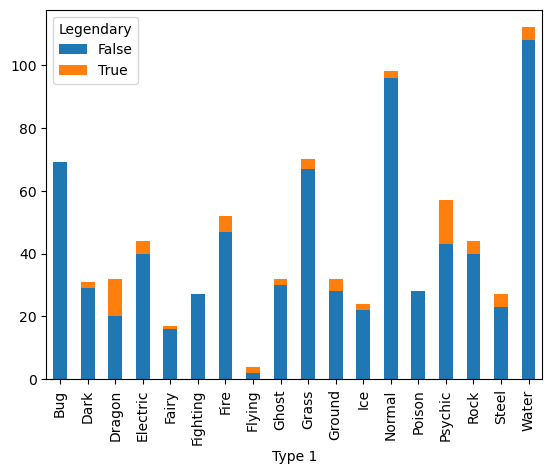

In [192]:
crosstab_pk_x.plot(kind="bar", stacked= True)
plt.show()

##### We can see in this crosstab and this stacked bar chart that the Type that has more Legendary pokemons is Psychic even though there are more Water type pokemons

Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [193]:
# Your code here:
from scipy.stats import chi2_contingency
chi2_stats, chi2_pvalue, _, _= chi2_contingency(crosstab_pk)
chi2_pvalue

5.118547414721704e-12

Based on a 95% confidence, should we reject the null hypothesis?

#### Your answer here:

Null Hypothesis (H₀): The categorical variables are independent.

Alternative Hypothesis (H₁): The categorical variables are dependent

Given the small p-value (much smaller than the alpha 0.05), we reject the null hypothesis and the categorical variables are not independent. This means that we can conclude that there is a significant relationship between the two categorical variables.

In [199]:
from scipy.stats.contingency import association

association(crosstab_pk, method="cramer")

0.3361928228447545

Using the cramer's V we can also see that there is a moderate association between these 2 variables, so we keep the decision to reject H0.